# Тестовое задание

In [1]:
from PIL import Image

import numpy as np

## 1.Получение черно-белого изображения

Прочитаем наши картинки и сохраним в 2d np.array

In [2]:
img = Image.open('Task01b.jpg')

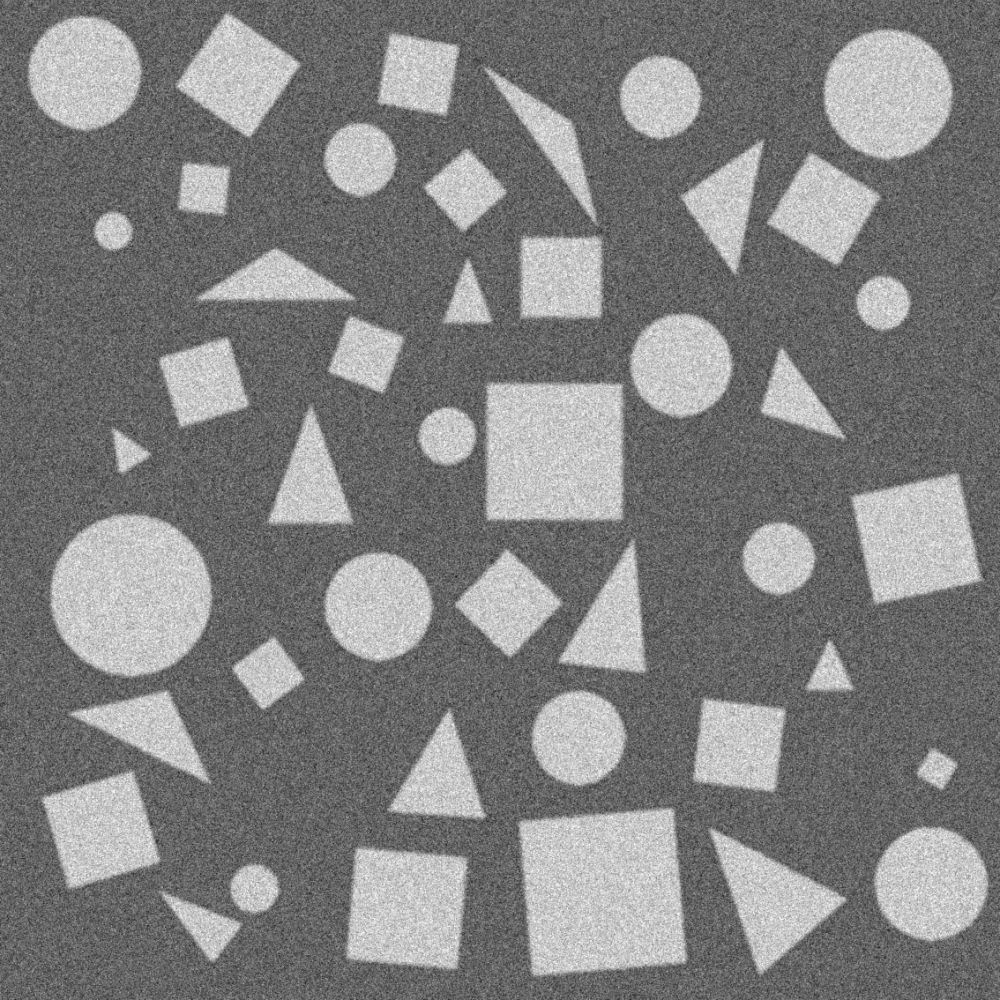

In [3]:
img

In [4]:
data = np.asarray(img, dtype="int32")

In [5]:
data.shape

(1000, 1000)

Получение черно-белого изображения

In [6]:
def black_whiter(image):
    mean = image.mean()
    
    def uncolor_pixel(pixel, mean):
        if pixel < mean:
            return 0
        else:
            return 255
    
    return np.vectorize(uncolor_pixel)(image, mean)

In [7]:
bw_data = black_whiter(data)

In [8]:
bw_img = Image.fromarray( np.asarray( np.clip(bw_data,0,255), dtype="uint8"), "L" )

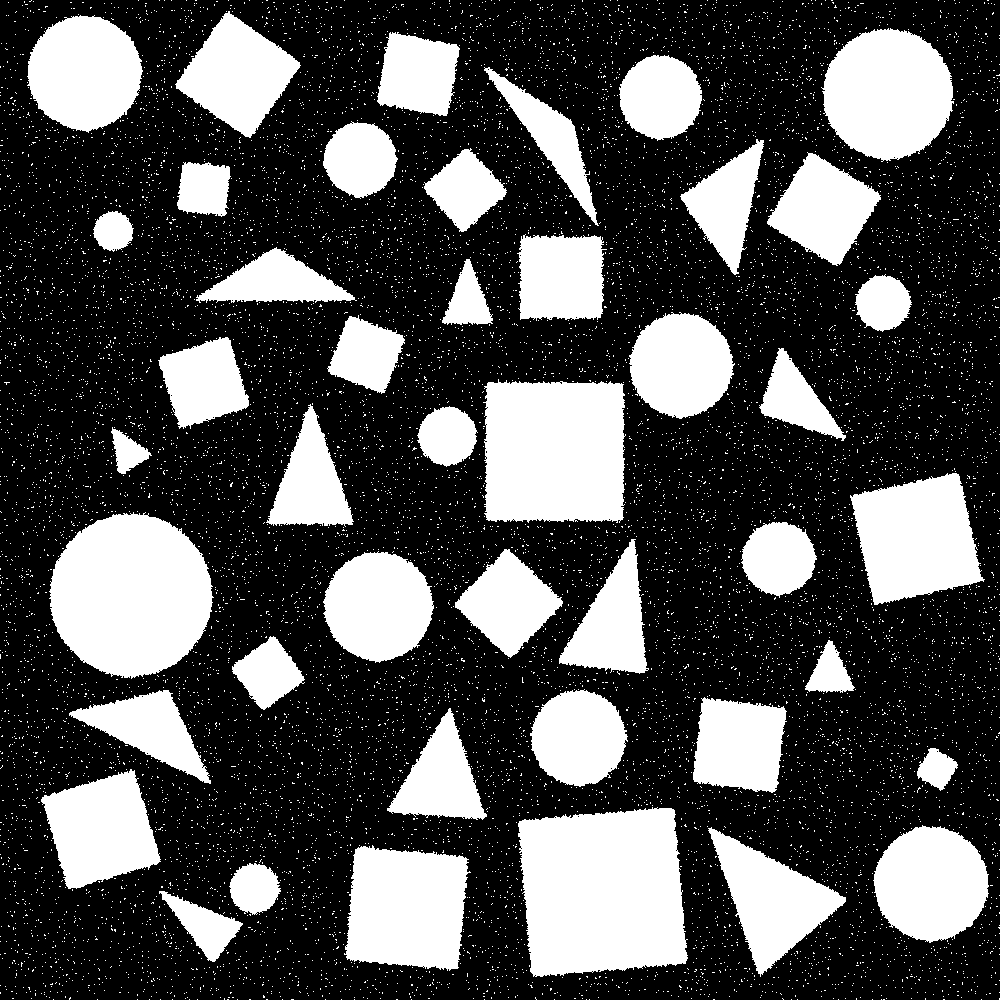

In [9]:
bw_img

Сделаем подобие конволюции для наведения резкости.

In [10]:
def sharpner(npdata, ker_size=10):
    sharped_data = np.ones(shape=npdata.shape) ** 255
    
    for i in range(ker_size // 2, npdata.shape[0] - (ker_size - ker_size // 2)):
        for j in range(ker_size // 2, npdata.shape[1] - (ker_size - ker_size // 2)):
            cur_window = npdata[i - ker_size // 2: i + ker_size // 2 + 1,
                                j - ker_size // 2: j + ker_size // 2 + 1]
            mean = np.clip(cur_window, 0, 1).mean()
            if mean > 0.5:
                sharped_data[i, j] = 255
            else:
                sharped_data[i, j] = 0
    
    return sharped_data

In [11]:
sharp_data = sharpner(bw_data, 2)

In [12]:
sharp_data = sharpner(sharp_data, 2)

In [13]:
sharp_data = sharpner(sharp_data, 2)

In [14]:
sharp_img = Image.fromarray( np.asarray( np.clip(sharp_data,0,255), dtype="uint8"), "L" )

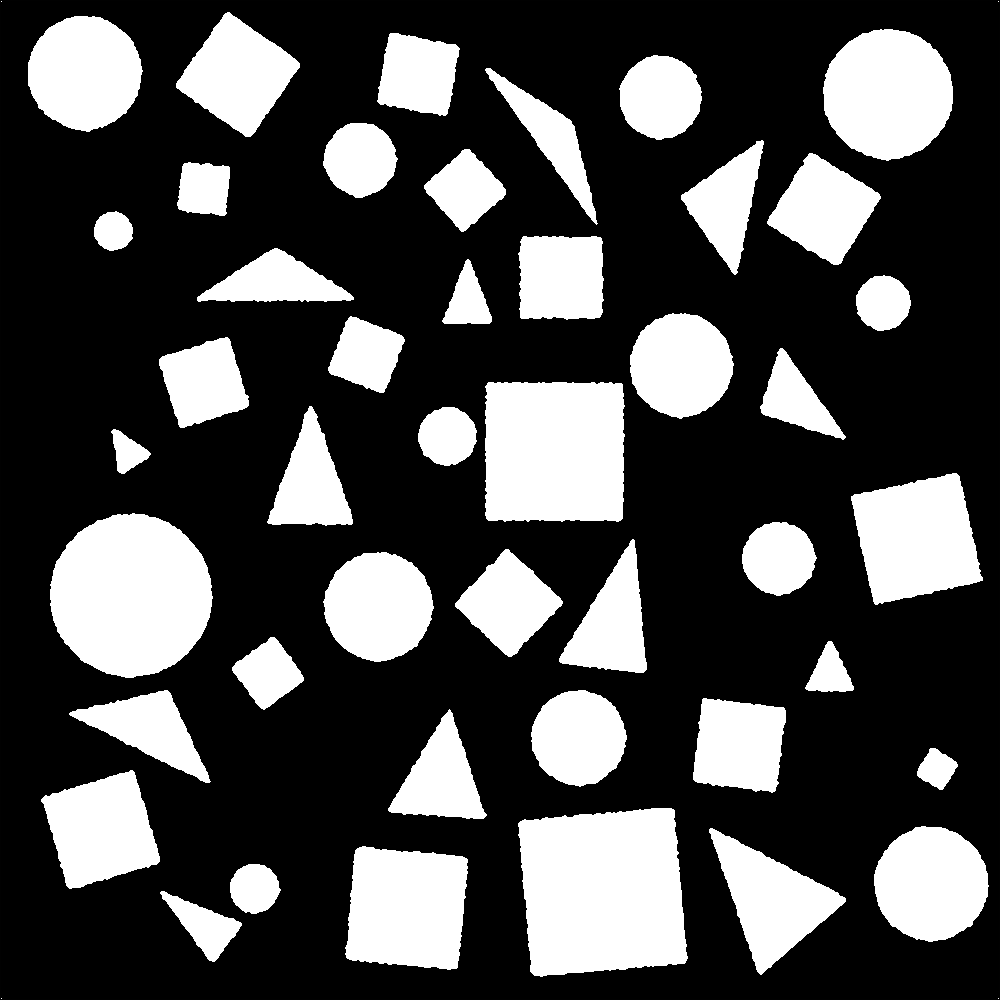

In [15]:
sharp_img

In [16]:
sharp_img.save('bw_image.jpg')